# Descarga y manipulación de históricos de precios
___

## 1. Uso de Pandas para bajar datos de Yahoo! Finance
En primer lugar, para poder bajar precios de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib para hacer gráficos de las series de datos.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

**Nota:** Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete `pandas_datareader`. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda: `conda install -c anaconda pandas-datareader`

Después correr el comando `conda update --all`.

**Referencia:**
https://anaconda.org/anaconda/pandas-datareader
___

In [6]:
#Descargar datos de Yahoo! finance
#Tickers
tickers = ['AA','AAPL','MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-01-01'
end_date = '2016-12-31'
# Usar el pandas data reader. El comando sort_index ordena los datos por fechas
assets = (web.DataReader(tickers, data_source, start_date, end_date)).sort_index('major_axis')

In [7]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

In [8]:
assets.loc[:, :, 'MSFT']

            Adj Close  Close   High    Low   Open     Volume
Date                                                        
2014-01-02     33.522  37.16  37.40  37.10  37.35  3.063e+07
2014-01-03     33.297  36.91  37.22  36.60  37.20  3.113e+07
2014-01-06     32.593  36.13  36.89  36.11  36.85  4.360e+07
2014-01-07     32.846  36.41  36.49  36.21  36.33  3.580e+07
2014-01-08     32.259  35.76  36.14  35.58  36.00  5.997e+07
...               ...    ...    ...    ...    ...        ...
2016-12-23     61.859  63.24  63.54  62.80  63.45  1.240e+07
2016-12-27     61.898  63.28  64.07  63.21  63.21  1.176e+07
2016-12-28     61.614  62.99  63.40  62.83  63.40  1.465e+07
2016-12-29     61.526  62.90  63.20  62.73  62.86  1.018e+07
2016-12-30     60.783  62.14  62.99  62.03  62.96  2.558e+07

[756 rows x 6 columns]

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Alcoa: AA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *assets*, que tiene la siguiente estructura:

In [3]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

___
El objeto *assets* tiene tres características: *items*, *major_axis* y *minor_axis*. Con estos, se pueden encontrar todos los registros almacenados.

In [4]:
assets.items

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [5]:
assets.major_axis

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

In [6]:
assets.minor_axis

Index(['AA', 'AAPL', 'MSFT', '^GSPC'], dtype='object')

In [9]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

In [7]:
assets.iloc[0,0,0]

24.485686999999999

In [8]:
assets.loc['Adj Close', '2014-01-02', 'AA']

24.485686999999999

De esta forma, es ordenar y acceder a los datos de una forma simple e intuitiva. Por ejemplo: los precios de cierre de Microsoft.

In [9]:
assets.loc['Adj Close', :, 'MSFT']
#assets.loc['Adj Close']['MSFT']

Date
2014-01-02    33.522
2014-01-03    33.297
2014-01-06    32.593
2014-01-07    32.846
2014-01-08    32.259
               ...  
2016-12-23    61.859
2016-12-27    61.898
2016-12-28    61.614
2016-12-29    61.526
2016-12-30    60.783
Name: MSFT, Length: 756, dtype: float64

O, los precios de apertura de Apple

In [10]:
assets.loc['Open', :, 'AAPL']
#assets.loc['Open']['APPL']

Date
2014-01-02     79.383
2014-01-03     78.980
2014-01-06     76.779
2014-01-07     77.760
2014-01-08     76.973
               ...   
2016-12-23    115.590
2016-12-27    116.520
2016-12-28    117.520
2016-12-29    116.450
2016-12-30    116.650
Name: AAPL, Length: 756, dtype: float64

También, los precios de cierre en la fecha *2014-01-14*

In [11]:
assets.loc['Close', '2014-01-14', :]
#assets.major_xs('2014-01-14')['Close']

AA         24.799
AAPL       78.056
MSFT       35.780
^GSPC    1838.880
Name: 2014-01-14 00:00:00, dtype: float64

O, finalmente, los valores del S&P500

In [12]:
assets.loc[:, :, '^GSPC']
#assets.minor_xs('^GSPC')

            Adj Close    Close     High      Low     Open     Volume
Date                                                                
2014-01-02    1831.98  1831.98  1845.86  1827.74  1845.86  3.081e+09
2014-01-03    1831.37  1831.37  1838.24  1829.13  1833.21  2.774e+09
2014-01-06    1826.77  1826.77  1837.16  1823.73  1832.31  3.295e+09
2014-01-07    1837.88  1837.88  1840.10  1828.71  1828.71  3.512e+09
2014-01-08    1837.49  1837.49  1840.02  1831.40  1837.90  3.652e+09
...               ...      ...      ...      ...      ...        ...
2016-12-23    2263.79  2263.79  2263.79  2258.84  2260.25  2.021e+09
2016-12-27    2268.88  2268.88  2273.82  2266.15  2266.23  1.987e+09
2016-12-28    2249.92  2249.92  2271.31  2249.11  2270.23  2.392e+09
2016-12-29    2249.26  2249.26  2254.51  2244.56  2249.50  2.336e+09
2016-12-30    2238.83  2238.83  2253.58  2233.62  2251.61  2.671e+09

[756 rows x 6 columns]

De donde, se pueden seleccionar los precios de cierre y ajustados en el cierre

In [13]:
GSPCAC = assets.loc[['Adj Close', 'Close'], :, '^GSPC']
#GSPCAC = assets.minor_xs('^GSPC')[['Adj Close', 'Close']]
GSPCAC

            Adj Close    Close
Date                          
2014-01-02    1831.98  1831.98
2014-01-03    1831.37  1831.37
2014-01-06    1826.77  1826.77
2014-01-07    1837.88  1837.88
2014-01-08    1837.49  1837.49
...               ...      ...
2016-12-23    2263.79  2263.79
2016-12-27    2268.88  2268.88
2016-12-28    2249.92  2249.92
2016-12-29    2249.26  2249.26
2016-12-30    2238.83  2238.83

[756 rows x 2 columns]

In [14]:
GSPCAC.loc['2015-01-05']

Adj Close    2020.58
Close        2020.58
Name: 2015-01-05 00:00:00, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

In [11]:
ticker_mx = ['GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'AEROMEX.MX']
source_mx = 'yahoo'
start_date_mx = '2014-01-01'
end_date_mx = '2014-12-31'

assets_mx = web.DataReader(ticker_mx, source_mx, start_date_mx, end_date_mx).sort_index('major_axis')

In [12]:
assets_mx

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 251 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2014-12-31 00:00:00
Minor_axis axis: AEROMEX.MX to GFNORTEO.MX

In [25]:
assets_mx_20140714 = assets_mx.loc['Adj Close', '2014-07-14']
assets_mx_20140714

AEROMEX.MX     22.070
GCARSOA1.MX    69.275
GFINBURO.MX    37.335
GFNORTEO.MX    84.203
Name: 2014-07-14 00:00:00, dtype: float64

In [26]:
assets_mx_20140714.idxmax(), assets_mx_20140714.max()

('GFNORTEO.MX', 84.203415000000007)

In [27]:
assets_mx_20140714.pop(assets_mx_20140714.idxmax());

In [35]:
assets_mx_AC = assets_mx.loc['Adj Close']

assets_mx_AC

            AEROMEX.MX  GCARSOA1.MX  GFINBURO.MX  GFNORTEO.MX
Date                                                         
2014-01-02       18.05       65.454       34.180       83.955
2014-01-03       18.09       65.814       33.742       84.754
2014-01-06       18.47       63.749       32.828       83.247
2014-01-07       19.46       63.256       33.923       83.551
2014-01-08       18.99       62.783       33.009       82.770
...                ...          ...          ...          ...
2014-12-24       19.64       70.361       35.787       74.561
2014-12-26       19.63       71.386       36.143       74.524
2014-12-29       19.52       71.750       36.845       75.257
2014-12-30       20.39       70.380       36.585       74.746
2014-12-31       20.44       69.528       36.633       75.312

[251 rows x 4 columns]

In [20]:
assets_mx_AC.iloc[[0, -1]]

            AEROMEX.MX  GCARSOA1.MX  GFINBURO.MX  GFNORTEO.MX
Date                                                         
2014-01-02       18.05       65.454       34.180       83.955
2014-12-31       20.44       69.528       36.633       75.312

In [37]:
assets_mx_AC.iloc[[0, -1]].diff().iloc[1:]

            AEROMEX.MX  GCARSOA1.MX  GFINBURO.MX  GFNORTEO.MX
Date                                                         
2014-12-31        2.39        4.074        2.454       -8.643

## 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios de cierre de Microsoft, así como el volumen de transacciones.

In [38]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

In [39]:
msftAC = assets.loc['Adj Close', :, 'MSFT']
msftV = assets.loc['Volume', :, 'MSFT']
msftAC

Date
2014-01-02    33.522
2014-01-03    33.297
2014-01-06    32.593
2014-01-07    32.846
2014-01-08    32.259
               ...  
2016-12-23    61.859
2016-12-27    61.898
2016-12-28    61.614
2016-12-29    61.526
2016-12-30    60.783
Name: MSFT, Length: 756, dtype: float64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

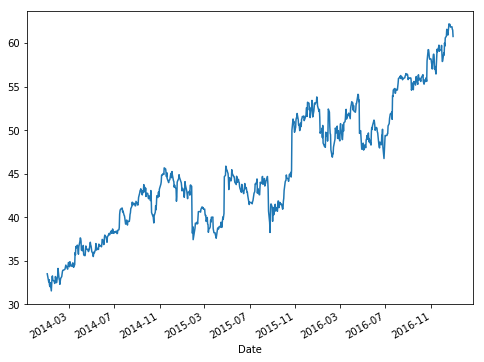

In [40]:
msftAC.plot(figsize=(8,6));

De forma similar, se grafica la serie de volúmenes de transacción

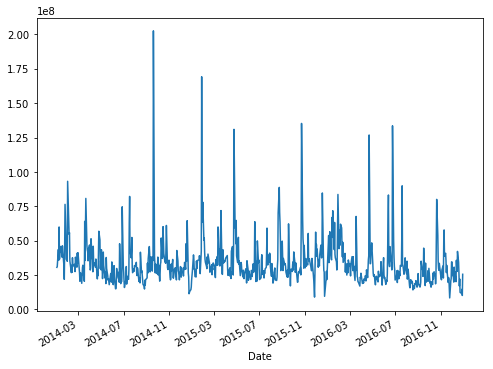

In [41]:
msftV.plot(figsize=(8,6));

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Microsoft.

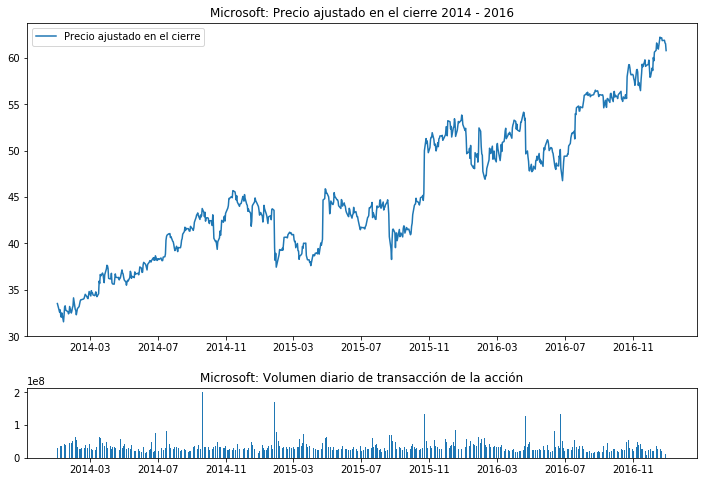

In [26]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(msftAC.index, msftAC, label='Precio ajustado en el cierre')
plt.title('Microsoft: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
bottom = plt.subplot2grid((4,4), (3, 0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

Otro procedimiento que se efectúa con freciencia es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [43]:
short_rollmean_msftAC = msftAC.rolling(window=20).mean()
long_rollmean_msftAC = msftAC.rolling(window=100).mean()

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

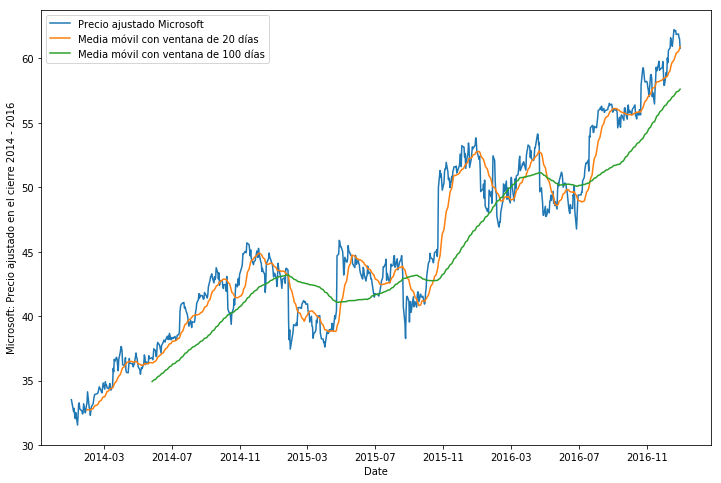

In [47]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(msftAC.index, msftAC, label='Precio ajustado Microsoft')
ax.plot(short_rollmean_msftAC.index, short_rollmean_msftAC, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_msftAC.index, long_rollmean_msftAC, label='Media móvil con ventana de 100 días')
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend(loc='best');

Las desviaciones estándar móviles se calculan con

In [48]:
short_rollstd_msftAC = msftAC.rolling(window=20).std()
long_rollstd_msftAC = msftAC.rolling(window=100).std()

y los gráficos...

In [49]:
msftAC

Date
2014-01-02    33.522
2014-01-03    33.297
2014-01-06    32.593
2014-01-07    32.846
2014-01-08    32.259
               ...  
2016-12-23    61.859
2016-12-27    61.898
2016-12-28    61.614
2016-12-29    61.526
2016-12-30    60.783
Name: MSFT, Length: 756, dtype: float64

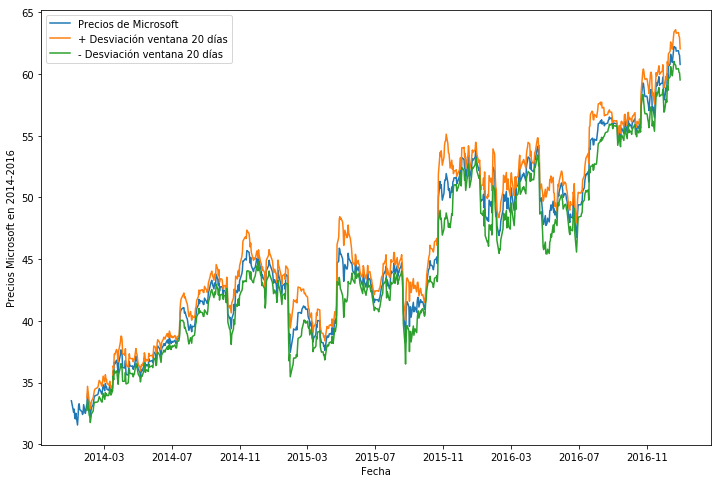

In [52]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(msftAC.index, msftAC, label = 'Precios de Microsoft')
ax.plot(msftAC.index, msftAC+short_rollstd_msftAC, label = '+ Desviación ventana 20 días')
ax.plot(msftAC.index, msftAC-short_rollstd_msftAC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Microsoft en 2014-2016')
ax.legend(loc='best')

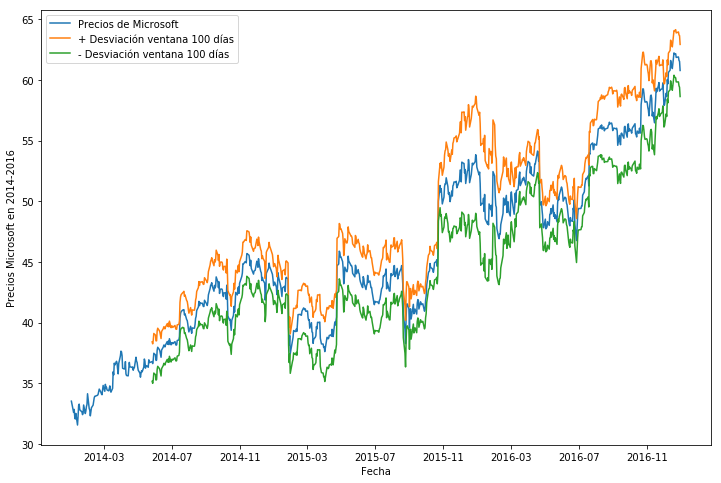

In [53]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(msftAC.index, msftAC, label = 'Precios de Microsoft')
ax.plot(msftAC.index, msftAC+long_rollstd_msftAC, label = '+ Desviación ventana 100 días')
ax.plot(msftAC.index, msftAC-long_rollstd_msftAC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Microsoft en 2014-2016')
ax.legend(loc='best')

O se pueden obtener los precios de cierre de todas las compañías

In [54]:
allAC = assets.loc['Adj Close']
allAC

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02  24.486   73.259  33.522  1831.98
2014-01-03  24.579   71.650  33.297  1831.37
2014-01-06  24.486   72.041  32.593  1826.77
2014-01-07  24.509   71.525  32.846  1837.88
2014-01-08  25.183   71.978  32.259  1837.49
...            ...      ...     ...      ...
2016-12-23  29.710  114.676  61.859  2263.79
2016-12-27  29.650  115.404  61.898  2268.88
2016-12-28  29.430  114.912  61.614  2249.92
2016-12-29  28.890  114.883  61.526  2249.26
2016-12-30  28.080  113.987  60.783  2238.83

[756 rows x 4 columns]

y graficarlos

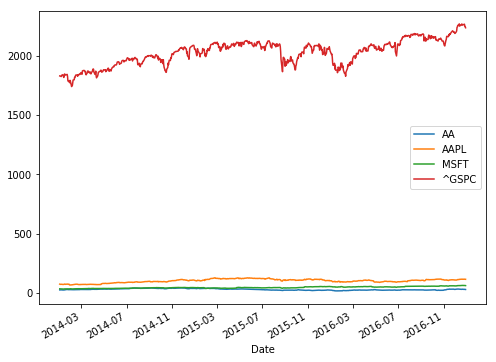

In [55]:
assets.loc['Adj Close'].plot(figsize=(8,6));

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

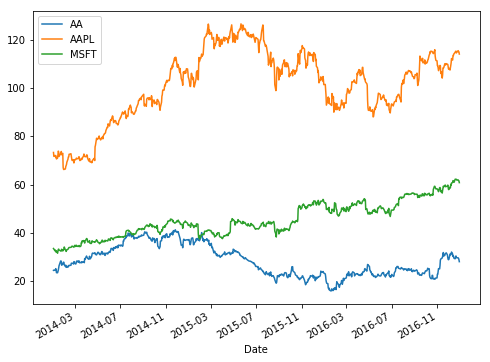

In [31]:
assets.loc['Adj Close', :, ['AA', 'AAPL', 'MSFT']].plot(figsize=(8,6));

## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [56]:
allAC

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02  24.486   73.259  33.522  1831.98
2014-01-03  24.579   71.650  33.297  1831.37
2014-01-06  24.486   72.041  32.593  1826.77
2014-01-07  24.509   71.525  32.846  1837.88
2014-01-08  25.183   71.978  32.259  1837.49
...            ...      ...     ...      ...
2016-12-23  29.710  114.676  61.859  2263.79
2016-12-27  29.650  115.404  61.898  2268.88
2016-12-28  29.430  114.912  61.614  2249.92
2016-12-29  28.890  114.883  61.526  2249.26
2016-12-30  28.080  113.987  60.783  2238.83

[756 rows x 4 columns]

In [57]:
allAC.shift(1)

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02     NaN      NaN     NaN      NaN
2014-01-03  24.486   73.259  33.522  1831.98
2014-01-06  24.579   71.650  33.297  1831.37
2014-01-07  24.486   72.041  32.593  1826.77
2014-01-08  24.509   71.525  32.846  1837.88
...            ...      ...     ...      ...
2016-12-23  29.750  114.450  62.162  2260.96
2016-12-27  29.710  114.676  61.859  2263.79
2016-12-28  29.650  115.404  61.898  2268.88
2016-12-29  29.430  114.912  61.614  2249.92
2016-12-30  28.890  114.883  61.526  2249.26

[756 rows x 4 columns]

In [58]:
Rall = ((allAC-allAC.shift(1))/allAC.shift(1)).iloc[1:]
Rall

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.799e-03 -2.197e-02 -6.728e-03 -3.330e-04
2014-01-06 -3.784e-03  5.453e-03 -2.113e-02 -2.512e-03
2014-01-07  9.497e-04 -7.151e-03  7.750e-03  6.082e-03
2014-01-08  2.751e-02  6.333e-03 -1.785e-02 -2.122e-04
2014-01-09 -1.293e-02 -1.277e-02 -6.431e-03  3.483e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.978e-03 -4.878e-03  1.252e-03
2016-12-27 -2.019e-03  6.351e-03  6.323e-04  2.248e-03
2016-12-28 -7.420e-03 -4.264e-03 -4.583e-03 -8.357e-03
2016-12-29 -1.835e-02 -2.569e-04 -1.429e-03 -2.933e-04
2016-12-30 -2.804e-02 -7.796e-03 -1.208e-02 -4.637e-03

[755 rows x 4 columns]

Ya está implementada la fórmula para obtener cambios porcentuales

In [33]:
Rall1 = allAC.pct_change(1).iloc[1:]
Rall1

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.799e-03 -2.197e-02 -6.728e-03 -3.330e-04
2014-01-06 -3.784e-03  5.453e-03 -2.113e-02 -2.512e-03
2014-01-07  9.497e-04 -7.151e-03  7.750e-03  6.082e-03
2014-01-08  2.751e-02  6.333e-03 -1.785e-02 -2.122e-04
2014-01-09 -1.293e-02 -1.277e-02 -6.431e-03  3.483e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.978e-03 -4.878e-03  1.252e-03
2016-12-27 -2.019e-03  6.351e-03  6.323e-04  2.248e-03
2016-12-28 -7.420e-03 -4.264e-03 -4.583e-03 -8.357e-03
2016-12-29 -1.835e-02 -2.569e-04 -1.429e-03 -2.933e-04
2016-12-30 -2.804e-02 -7.796e-03 -1.208e-02 -4.637e-03

[755 rows x 4 columns]

y la gráfica de los mismos se puede obtener como

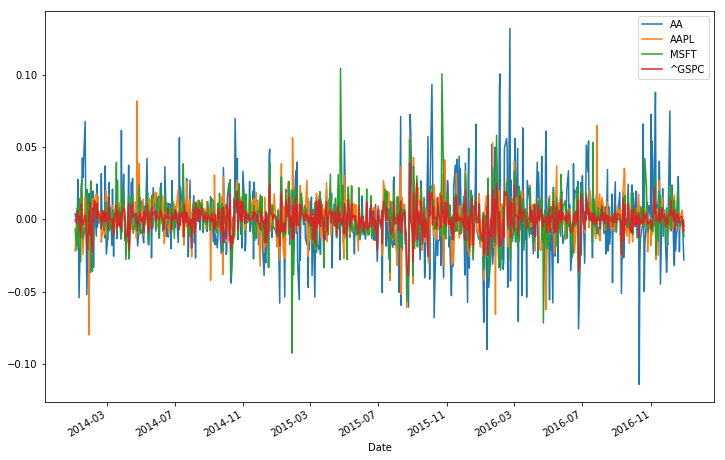

In [34]:
Rall.plot(figsize=(12,8));

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

In [59]:
rall = np.log(allAC/allAC.shift(1)).iloc[1:]

In [60]:
rall

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.791e-03 -2.221e-02 -6.750e-03 -3.330e-04
2014-01-06 -3.791e-03  5.438e-03 -2.136e-02 -2.515e-03
2014-01-07  9.492e-04 -7.177e-03  7.720e-03  6.063e-03
2014-01-08  2.714e-02  6.313e-03 -1.801e-02 -2.122e-04
2014-01-09 -1.301e-02 -1.285e-02 -6.452e-03  3.482e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.976e-03 -4.890e-03  1.251e-03
2016-12-27 -2.022e-03  6.331e-03  6.321e-04  2.246e-03
2016-12-28 -7.448e-03 -4.273e-03 -4.593e-03 -8.392e-03
2016-12-29 -1.852e-02 -2.570e-04 -1.430e-03 -2.933e-04
2016-12-30 -2.844e-02 -7.826e-03 -1.216e-02 -4.648e-03

[755 rows x 4 columns]

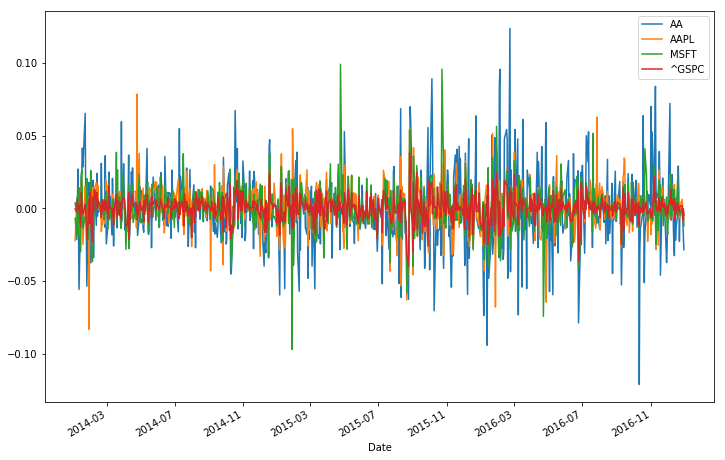

In [61]:
rall.plot(figsize=(12,8));

Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

In [47]:
np.abs(rall-Rall)

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  7.196e-06  2.448e-04  2.273e-05  5.545e-08
2014-01-06  7.178e-06  1.481e-05  2.265e-04  3.160e-06
2014-01-07  4.506e-07  2.569e-05  2.987e-05  1.842e-05
2014-01-08  3.717e-04  1.997e-05  1.613e-04  2.252e-08
2014-01-09  8.428e-05  8.224e-05  2.077e-05  6.065e-08
...               ...        ...        ...        ...
2016-12-23  9.047e-07  1.953e-06  1.194e-05  7.827e-07
2016-12-27  2.042e-06  2.008e-05  1.998e-07  2.524e-06
2016-12-28  2.766e-05  9.117e-06  1.053e-05  3.511e-05
2016-12-29  1.704e-04  3.301e-08  1.022e-06  4.302e-08
2016-12-30  4.006e-04  3.055e-05  7.359e-05  1.078e-05

[755 rows x 4 columns]

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [62]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [63]:
msftAC

Date
2014-01-02    33.522
2014-01-03    33.297
2014-01-06    32.593
2014-01-07    32.846
2014-01-08    32.259
               ...  
2016-12-23    61.859
2016-12-27    61.898
2016-12-28    61.614
2016-12-29    61.526
2016-12-30    60.783
Name: MSFT, Length: 756, dtype: float64

In [64]:
Rmsft = simple_daily_ret(msftAC)

In [65]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

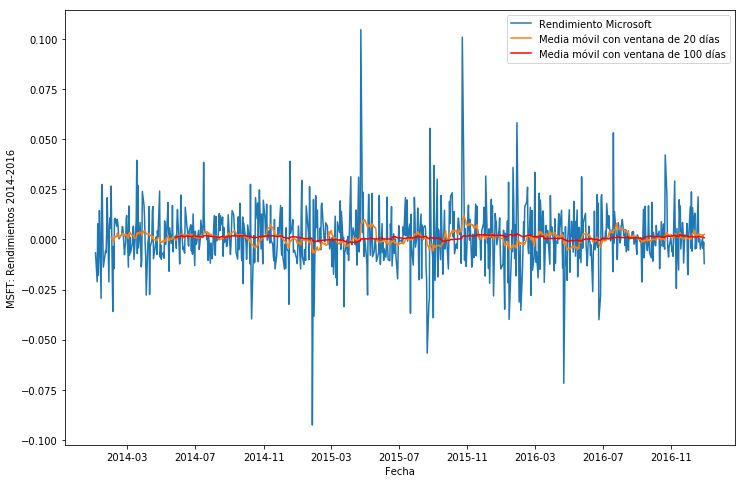

In [69]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2014-2016')
ax.legend(loc='best');

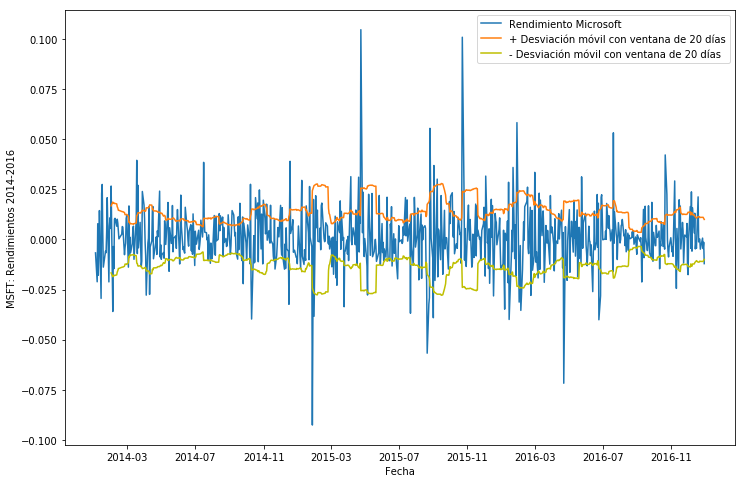

In [68]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2014-2016')
ax.legend(loc='best');

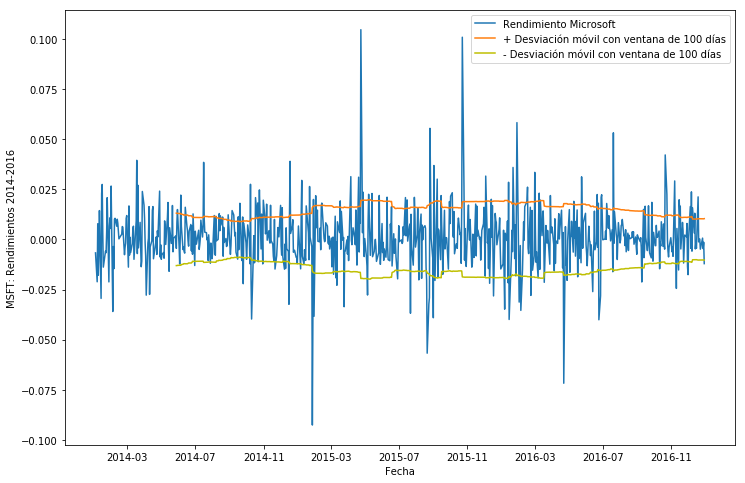

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2014-2016')
ax.legend(loc='best');

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

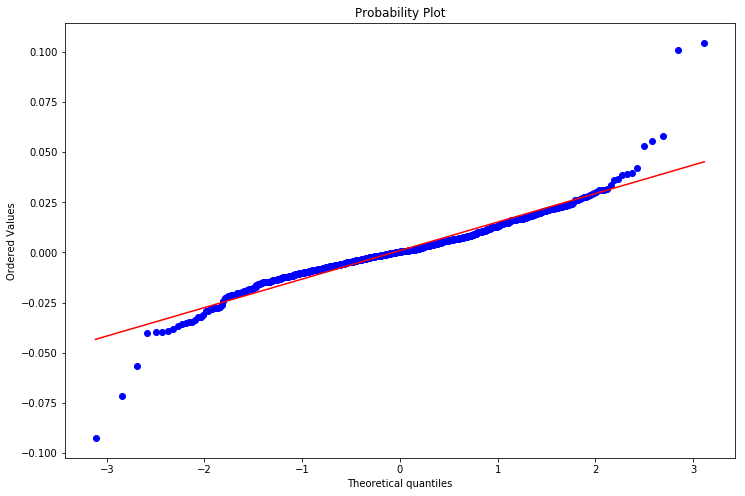

In [72]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist='norm', plot=ax);

Una más, con la librería seaborn...

In [73]:
import seaborn as sns

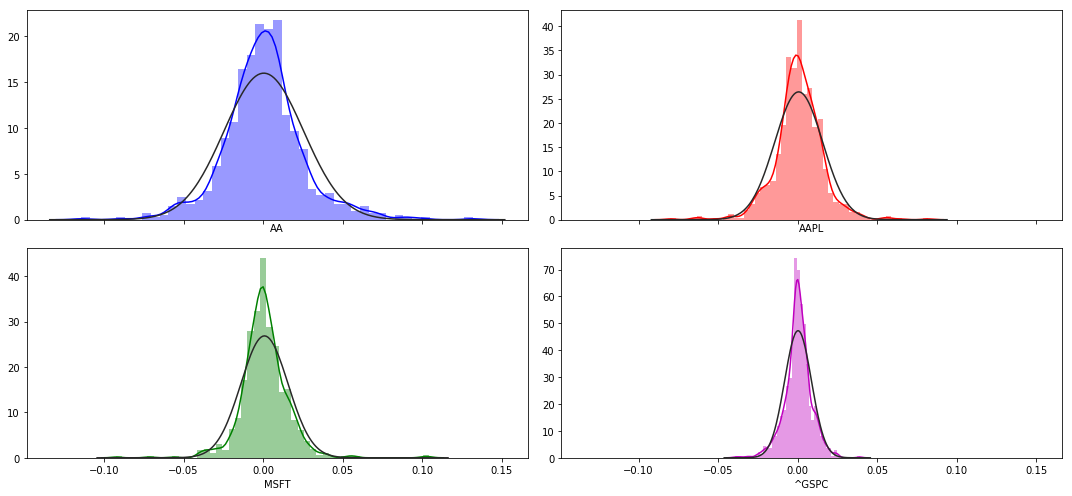

In [74]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall.loc[:,'AA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall.loc[:,'AAPL'], color="r", fit=stats.norm, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>